<a href="https://colab.research.google.com/github/carlosmend/NLP/blob/main/EDA_on_suicidal_texts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Roberto Carlos Mendoza Giraldo


In [ ]:
!wget raw.githubusercontent.com/carlosmend/Datasets_tesis/main/data_raw.csv
!wget raw.githubusercontent.com/carlosmend/Datasets_tesis/main/text_clean_stop.csv
!wget raw.githubusercontent.com/carlosmend/Datasets_tesis/main/text_lemma.csv
import pandas as pd
import numpy as np
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import requests
from io import BytesIO
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from nltk import ngrams

url = "https://cdn-icons-png.flaticon.com/512/39/39552.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))


<h1>EDA on data raw<h1>

In [ ]:
data_raw=pd.read_csv('data_raw.csv')
data_raw.sample(10)

traducido       class
54282  Esto será un Copypasta divertido, ¿qué es lo q...  no_suicida
59547  Únase a mi servidor de discordia tenemos chats...  no_suicida
12115  Estoy tan perdido.Ayúdame por favor. No sé si ...     suicida
67143  Como chica, no veo a suficientes chicos que se...  no_suicida
63852  Déjame contarte una historia, ¿alguna vez escu...  no_suicida
51473  Qué bueno es el cruzar animal New Horizons I m...  no_suicida
82464  Chicos, solo lanzé mi primer álbum, estoy tan ...  no_suicida
5025   ¿Alguien ha dejado de querer morir si es así?S...     suicida
77378  Decir bromas hasta que Corona se haya ido el D...  no_suicida
66439  Ay Bois, todos escucharon sobre Zenith MMO, es...  no_suicida

In [ ]:
class_0 = data_raw[data_raw['class'] == 'suicida']
class_1 = data_raw[data_raw['class'] == 'no_suicida']

class_0=class_0.sample(40000)
class_1=class_1.sample(40000)
data_raw=pd.concat([class_0,class_1], axis=0)
data_raw.value_counts('class')

class
no_suicida    40000
suicida       40000
dtype: int64

In [ ]:
import re
import string
def clean_text(text):
    # convert text to lowercase
    text = text.lower()

    #Remove URLs
    text=re.sub(r'http:?\S+','',text)

    # Remove punctuation characters
    text = re.sub("[%s]" % re.escape(string.punctuation), " ", text)

    # Remove non-ASCII characters, but ncluding Latin characters
    text = re.sub("([^\x00-\x7F\u00C0-\u017F])+", " ", text)
    text = [palabra for palabra in text.split()]
    return text


In [ ]:
data_raw['text_tokenize']=data_raw['traducido'].apply(lambda x:clean_text(x))

Mean number of words per text

In [ ]:
mean = data_raw.groupby('class')['traducido'].apply(lambda x: x.str.len().mean())
mean

class
no_suicida    304.951300
suicida       948.179675
Name: traducido, dtype: float64

Total words per category

In [ ]:
text_token = data_raw.explode('text_tokenize')
print('words per category')
print('--------------------------')
text_token.groupby(by='class')['text_tokenize'].count()

words per category
--------------------------


class
no_suicida    2185900
suicida       6839269
Name: text_tokenize, dtype: int64

In [ ]:
print('Different words per category')
print('----------------------------')
text_token.groupby(by='class')['text_tokenize'].nunique()

Different words per category
----------------------------


class
no_suicida    61463
suicida       71060
Name: text_tokenize, dtype: int64

In [ ]:
word_count=text_token.groupby(['class', 'text_tokenize'])['text_tokenize'].size().reset_index(name='count')
top_words_suicide = word_count[word_count['class'] == 'suicida'].sort_values('count', ascending=False)[[ 'text_tokenize','count']]
top_words_non_suicide = word_count[word_count['class'] == 'no_suicida'].sort_values('count', ascending=False)[[ 'text_tokenize','count']]

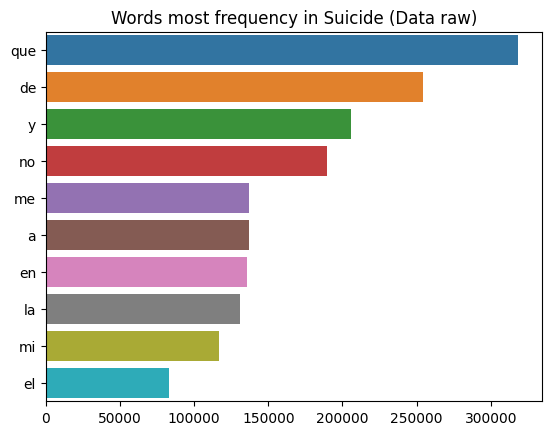

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(top_words_suicide.iloc[i][0])
  frequency.append(top_words_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('Words most frequency in Suicide (Data raw)')
plt.show()

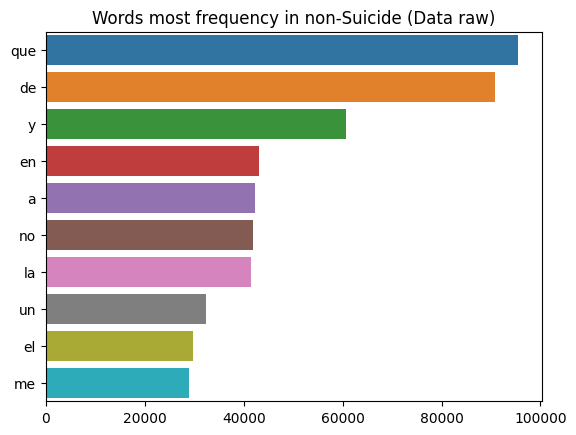

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(top_words_non_suicide.iloc[i][0])
  frequency.append(top_words_non_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('Words most frequency in non-Suicide (Data raw)')
plt.show()

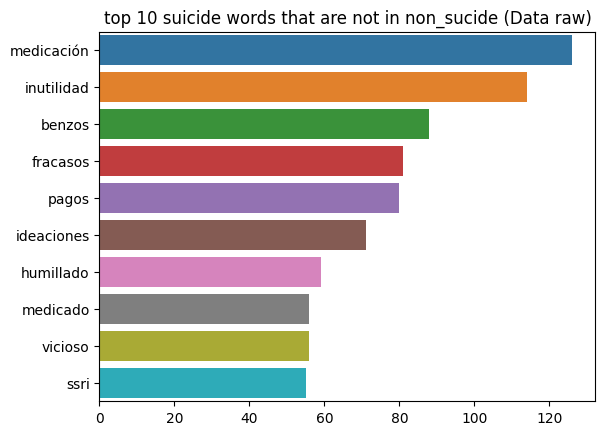

In [ ]:
not_in_non_suicide = top_words_suicide[~top_words_suicide['text_tokenize'].isin(top_words_non_suicide['text_tokenize'])]
words_remove = ['mei','nowoww']
filter= ~not_in_non_suicide['text_tokenize'].str.contains('|'.join(words_remove))
not_in_non_suicide=not_in_non_suicide[filter]
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(not_in_non_suicide.iloc[i][0])
  frequency.append(not_in_non_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('top 10 suicide words that are not in non_sucide (Data raw)')
plt.show()



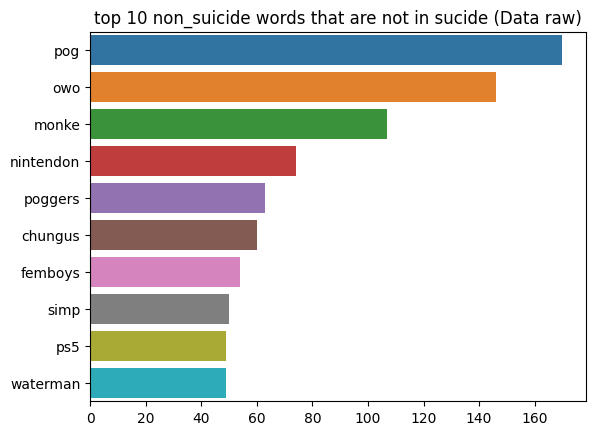

In [ ]:
not_in_suicide=top_words_non_suicide[~top_words_non_suicide['text_tokenize'].isin(top_words_suicide['text_tokenize'])]
#----------------------------------------------------------------
words_remove = ['filler', 'aaaaaaaaaaaaaaaaaaaaaaaaa','nnn','redader','tgénesis','fillerfiller','fiminador','brice','snoo','maddock','rellenador','llenador']
filter= ~not_in_suicide['text_tokenize'].str.contains('|'.join(words_remove))
not_in_suicide=not_in_suicide[filter]
#-------------------------------------------


words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(not_in_suicide.iloc[i][0])
  frequency.append(not_in_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('top 10 non_suicide words that are not in sucide (Data raw)')
plt.show()

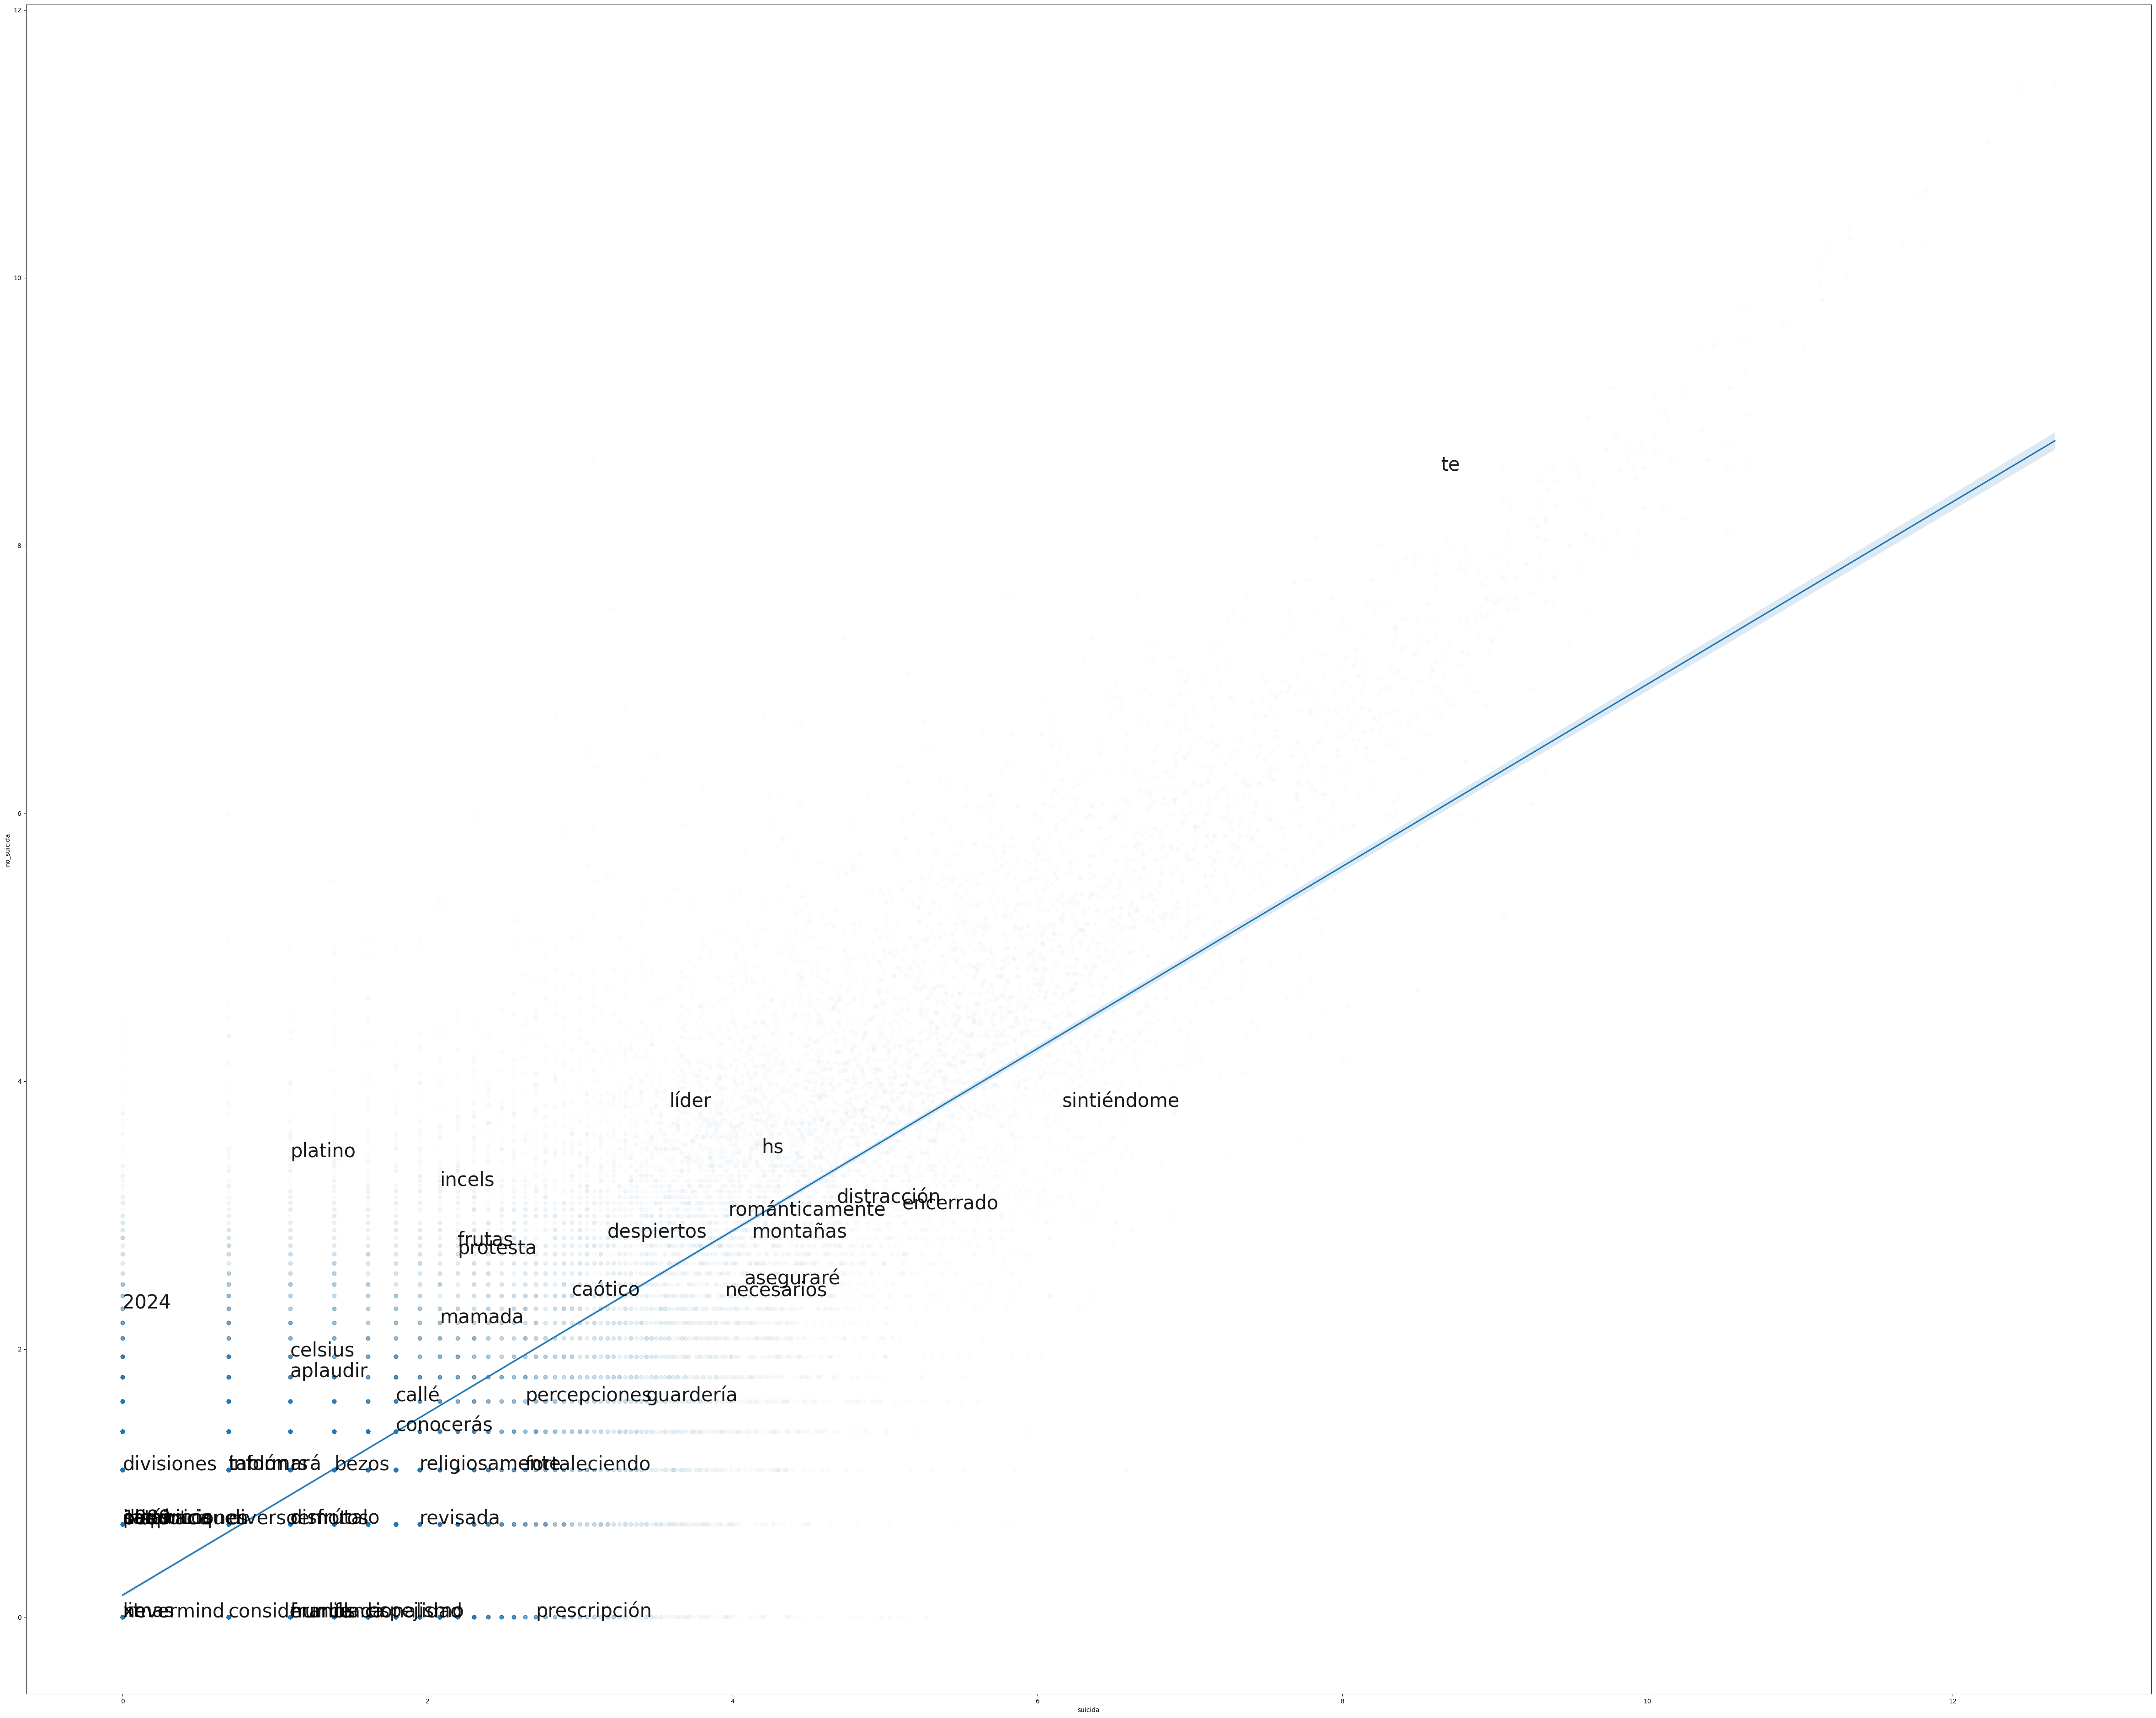

In [ ]:
# Pivotado de datos
tweets_pivot=text_token.groupby(by=['class','text_tokenize'])['text_tokenize'] \
.agg(["count"]).reset_index()\
.pivot(index = 'text_tokenize', columns="class", values= "count")
text_token.columns.name = None

#Grafico de correlación
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# Gráfico de correlación
# ==============================================================================
f, ax = plt.subplots(figsize=(60, 48))
temp = tweets_pivot.dropna()
sns.regplot(
    x  = np.log(temp.suicida),
    y  = np.log(temp.no_suicida),
    scatter_kws =  {'alpha': 0.015},
    ax = ax
);
#num samples -> 60
for i in np.random.choice(range(temp.shape[0]), 50):
    ax.annotate(
        text  = temp.index[i],
        xy    = (np.log(temp.suicida[i]), np.log(temp.no_suicida[i])),
        alpha = 0.9,
        fontsize=30
    )

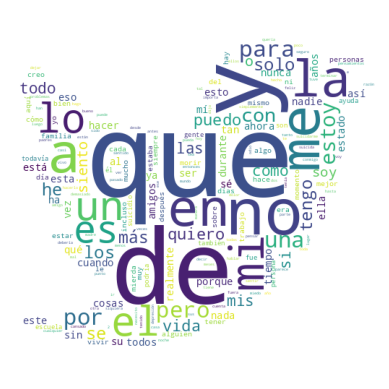

In [ ]:
 dict_freq_suicide = dict(zip(top_words_suicide['text_tokenize'],top_words_suicide['count']))
masks=np.array(img)
masks = np.invert(masks)
wordcloud2 = WordCloud(font_path=None,
                mask=masks, background_color ='white',
                max_words=200,max_font_size = 256,
                random_state=42, width=masks.shape[1],
                height=masks.shape[0],
                stopwords = set(STOPWORDS))


wordcloud2.generate_from_frequencies(dict_freq_suicide)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

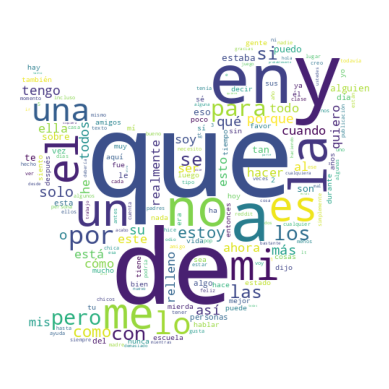

In [ ]:
dict_freq_non_suicide = dict(zip(top_words_non_suicide['text_tokenize'],top_words_non_suicide['count']))
masks=np.array(img)
masks = np.invert(masks)
wordcloud2 = WordCloud(font_path=None,
                mask=masks, background_color ='white',
                max_words=200,max_font_size = 256,
                random_state=42, width=masks.shape[1],
                height=masks.shape[0],
                stopwords = set(STOPWORDS))


wordcloud2.generate_from_frequencies(dict_freq_non_suicide)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

<h1>EDA on clean data+stopWords<h1>

In [ ]:
dataset=pd.read_csv('text_clean_stop.csv')
dataset.sample(10)

class                                    text_clean_stop
21961     suicida  quiero morir mal siento suicidarme única forma...
43709  no_suicida               deseo feliz año nuevo mantente salvo
47281  no_suicida  realmente odio tener viajar ciudad entera maña...
20204     suicida  haces divertirte haces divertirme vida valga p...
13288     suicida  obtuve suministros hoy habitación aproximadame...
38991     suicida  día consideré seriamente sobredosis sala emerg...
25088     suicida   puedo hablar contigo preocuparme odio guste aquí
13994     suicida  sexualmente incompetente años debido circuncis...
64438  no_suicida                      pierde emoji anti emoji lindo
82508  no_suicida  chicos así podría ser genio comedia así idea d...

First, we must balance the data

In [ ]:
class_0 = dataset[dataset['class'] == 'suicida']
class_1 = dataset[dataset['class'] == 'no_suicida']

class_0=class_0.sample(40000)
class_1=class_1.sample(40000)
dataset=pd.concat([class_0,class_1], axis=0)
dataset.value_counts('class')


class
no_suicida    40000
suicida       40000
dtype: int64

In [ ]:
media = dataset.groupby('class')['text_clean_stop'].apply(lambda x: x.str.len().mean())
media


class
no_suicida    194.471505
suicida       595.910653
Name: text_clean_stop, dtype: float64

In [ ]:
dataset['text_tokenize'] = dataset['text_clean_stop'].apply(lambda x: tokenize(x))

In [ ]:
text_token = dataset.explode('text_tokenize')
print('Words per category')
print('--------------------------')
text_token.groupby(by='class')['text_tokenize'].count()

Words per category
--------------------------


class
no_suicida    1043610
suicida       3186205
Name: text_tokenize, dtype: int64

In [ ]:
print('Different words per category')
print('----------------------------')
text_token.groupby(by='class')['text_tokenize'].nunique()

Different words per category
----------------------------


class
no_suicida    58398
suicida       68996
Name: text_tokenize, dtype: int64

In [ ]:
word_count=text_token.groupby(['class', 'text_tokenize'])['text_tokenize'].size().reset_index(name='count')
top_words_suicide = word_count[word_count['class'] == 'suicida'].sort_values('count', ascending=False)[[ 'text_tokenize','count']]
top_words_non_suicide = word_count[word_count['class'] == 'no_suicida'].sort_values('count', ascending=False)[[ 'text_tokenize','count']]

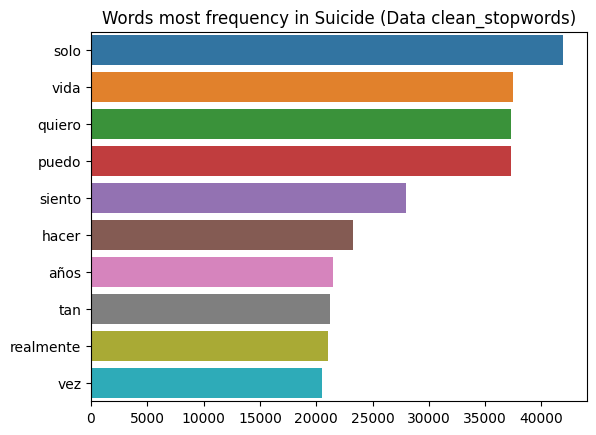

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(top_words_suicide.iloc[i][0])
  frequency.append(top_words_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('Words most frequency in Suicide (Data clean_stopwords)')
plt.show()

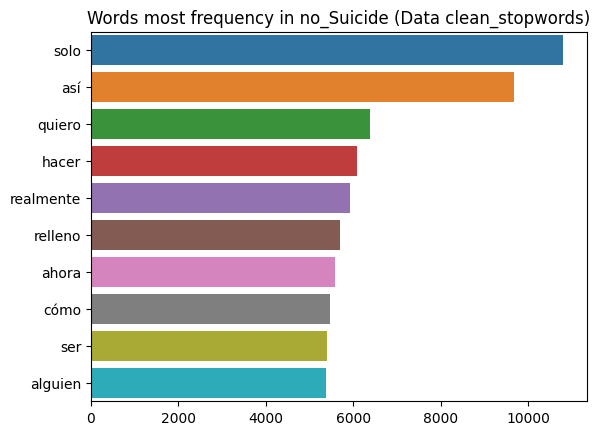

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(top_words_non_suicide.iloc[i][0])
  frequency.append(top_words_non_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('Words most frequency in no_Suicide (Data clean_stopwords)')
plt.show()

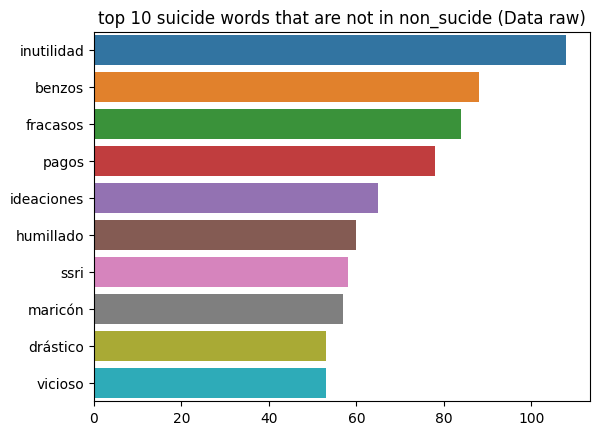

In [ ]:
not_in_non_suicide = top_words_suicide[~top_words_suicide['text_tokenize'].isin(top_words_non_suicide['text_tokenize'])]
#----------------------------------------------------------------
words_remove = ['mei','iti']
filter= ~not_in_non_suicide['text_tokenize'].str.contains('|'.join(words_remove))
not_in_non_suicide=not_in_non_suicide[filter]
#-------------------------------------------
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(not_in_non_suicide.iloc[i][0])
  frequency.append(not_in_non_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('top 10 suicide words that are not in non_sucide (Data raw)')
plt.show()


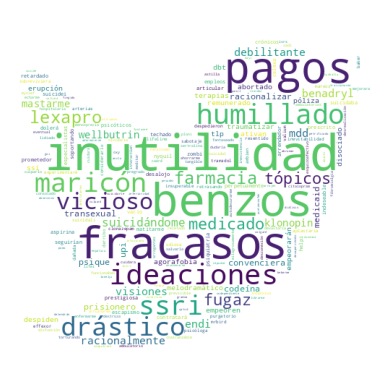

In [ ]:
dict_freq_suicide = dict(zip(not_in_non_suicide['text_tokenize'],not_in_non_suicide['count']))
masks=np.array(img)
masks = np.invert(masks)
wordcloud2 = WordCloud(font_path=None,
                mask=masks, background_color ='white',
                max_words=200,max_font_size = 256,
                random_state=42, width=masks.shape[1],
                height=masks.shape[0],
                stopwords = set(STOPWORDS))


wordcloud2.generate_from_frequencies(dict_freq_suicide)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

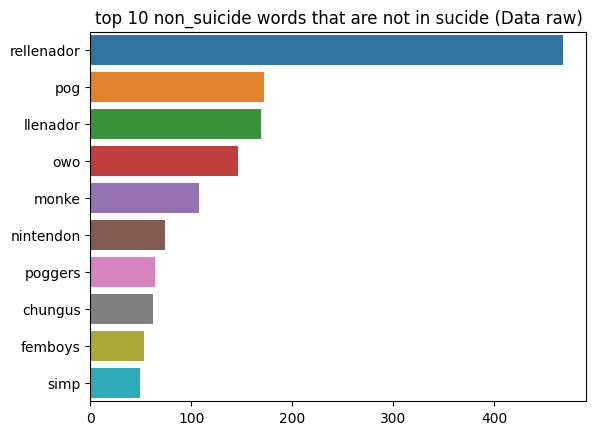

In [ ]:
not_in_suicide=top_words_non_suicide[~top_words_non_suicide['text_tokenize'].isin(top_words_suicide['text_tokenize'])]
#----------------------------------------------------------------
words_remove = ['filler', 'aaaaaaaaaaaaaaaaaaaaaaaaa','nnn','redader','tgénesis','fillerfiller','fiminador','brice','snoo','maddock']
filter= ~not_in_suicide['text_tokenize'].str.contains('|'.join(words_remove))
not_in_suicide=not_in_suicide[filter]
#-------------------------------------------
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(not_in_suicide.iloc[i][0])
  frequency.append(not_in_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('top 10 non_suicide words that are not in sucide (Data raw)')
plt.show()

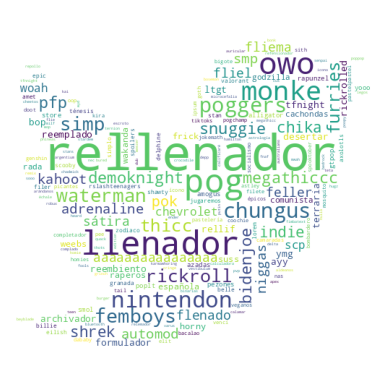

In [ ]:
dict_freq_non_suicide = dict(zip(not_in_suicide['text_tokenize'],not_in_suicide['count']))
masks=np.array(img)
masks = np.invert(masks)
wordcloud2 = WordCloud(font_path=None,
                mask=masks, background_color ='white',
                max_words=200,max_font_size = 256,
                random_state=42, width=masks.shape[1],
                height=masks.shape[0],
                stopwords = set(STOPWORDS))


wordcloud2.generate_from_frequencies(dict_freq_non_suicide)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

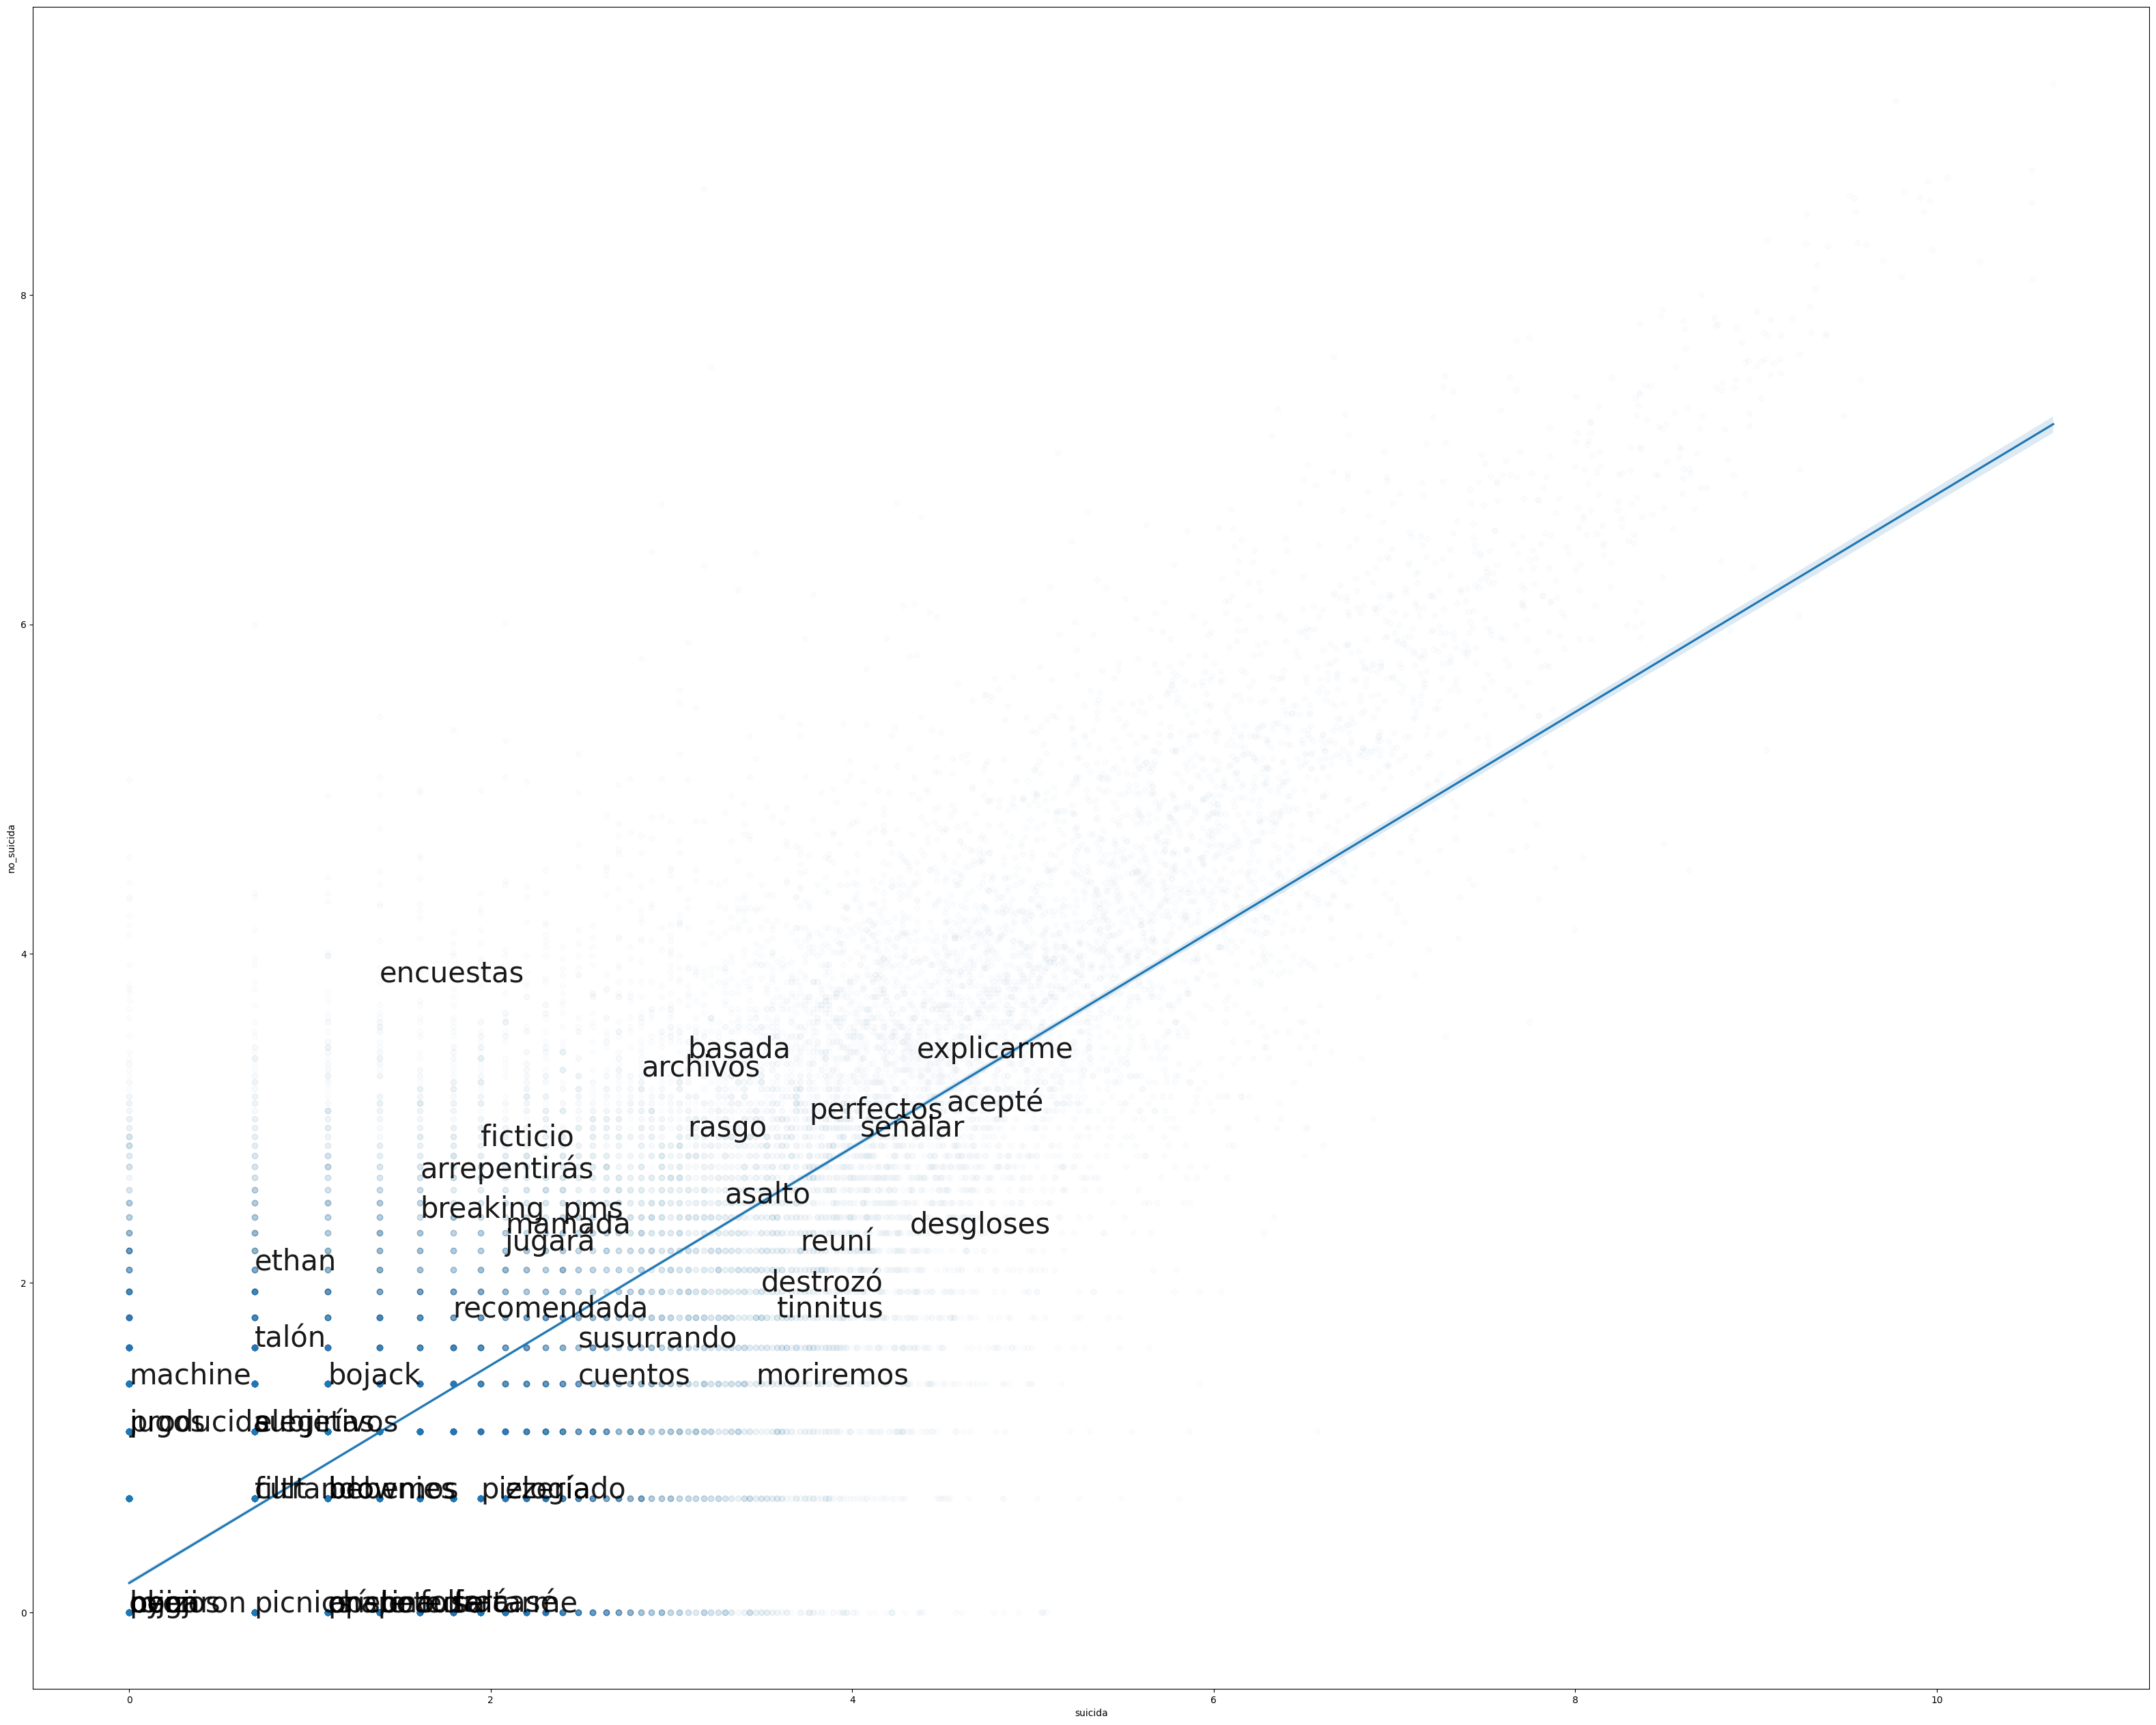

In [ ]:
# Pivotado de datos
tweets_pivot=text_token.groupby(by=['class','text_tokenize'])['text_tokenize'] \
.agg(["count"]).reset_index()\
.pivot(index = "text_tokenize" , columns="class", values= "count")
text_token.columns.name = None

#Grafico de correlación
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# Gráfico de correlación
# ==============================================================================
f, ax = plt.subplots(figsize=(40, 32))
temp = tweets_pivot.dropna()
sns.regplot(
    x  = np.log(temp.suicida),
    y  = np.log(temp.no_suicida),
    scatter_kws =  {'alpha': 0.015},
    ax = ax
);
#num de muestras -> 60
for i in np.random.choice(range(temp.shape[0]), 50):
    ax.annotate(
        text  = temp.index[i],
        xy    = (np.log(temp.suicida[i]), np.log(temp.no_suicida[i])),
        alpha = 0.9,
        fontsize=30
    )

<h1> EDA on lemmatized data <h1>




In [ ]:
data_norm=pd.read_csv('text_lemma.csv')


In [ ]:
class_0 = data_norm[data_norm['class'] == 'suicida']
class_1 = data_norm[data_norm['class'] == 'no_suicida']

class_0=class_0.sample(40000)
class_1=class_1.sample(40000)
data_norm=pd.concat([class_0,class_1], axis=0)
data_norm.value_counts('class')


class
no_suicida    40000
suicida       40000
dtype: int64

In [ ]:
data_norm['text_tokenize'] = data_norm['text_lemma'].apply(lambda x: tokenize(x))

In [ ]:
#Palabras totales por categoría
text_token_norm = data_norm.explode('text_tokenize')
print('Words per category')
print('--------------------------')
text_token_norm.groupby(by='class')['text_tokenize'].count()

Words per category
--------------------------


class
no_suicida    1598379
suicida       5083974
Name: text_tokenize, dtype: int64

In [ ]:
# Palabras distintas utilizadas por cada categoría
print('Different words per category')
print('----------------------------')
text_token_norm.groupby(by='class')['text_tokenize'].nunique()

Different words per category
----------------------------


class
no_suicida    43658
suicida       49718
Name: text_tokenize, dtype: int64

In [ ]:
word_count=text_token_norm.groupby(['class', 'text_tokenize'])['text_tokenize'].size().reset_index(name='count')
top_words_suicide = word_count[word_count['class'] == 'suicida'].sort_values('count', ascending=False)[[ 'text_tokenize','count']]
top_words_non_suicide = word_count[word_count['class'] == 'no_suicida'].sort_values('count', ascending=False)[[ 'text_tokenize','count']]

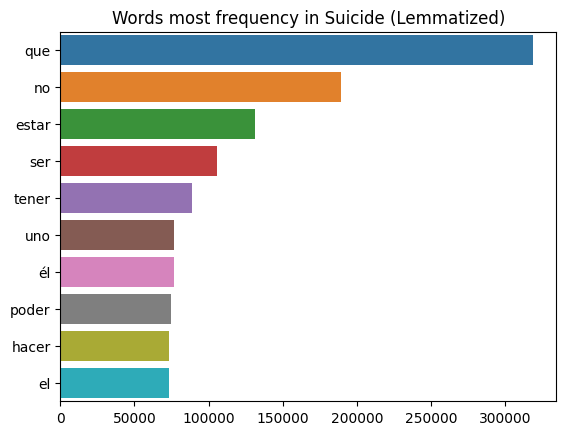

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(top_words_suicide.iloc[i][0])
  frequency.append(top_words_suicide.iloc[i][1])
sns.barplot(x = frequency, y = words)
ax.set_title('Words most frequency in Suicide (Lemmatized)')
plt.show()

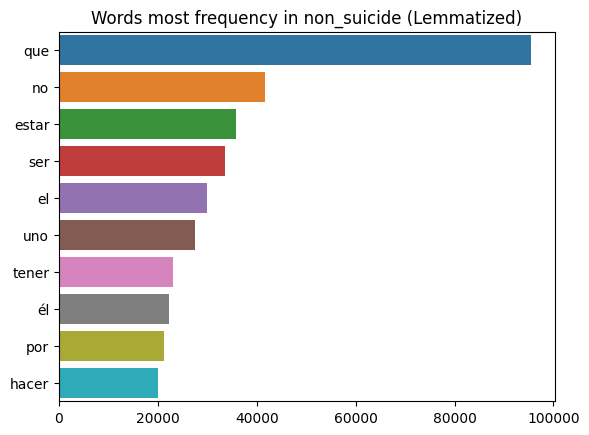

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(top_words_non_suicide.iloc[i][0])
  frequency.append(top_words_non_suicide.iloc[i][1])
sns.barplot(x = frequency, y = words)
ax.set_title('Words most frequency in non_suicide (Lemmatized)')
plt.show()

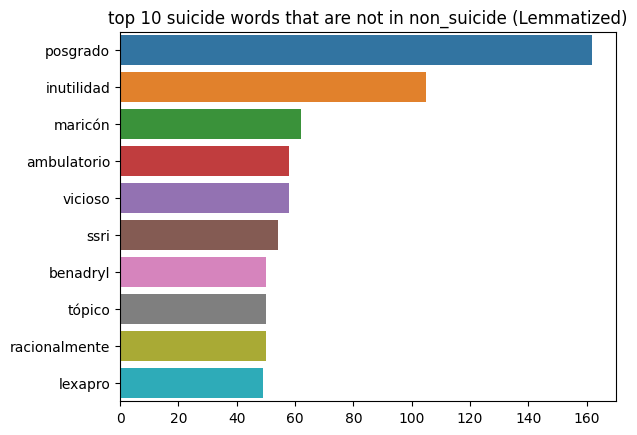

In [ ]:
not_in_non_suicide = top_words_suicide[~top_words_suicide['text_tokenize'].isin(top_words_non_suicide['text_tokenize'])]
#----------------------------------------------------------------
words_remove = ['mei','nowoww','iti']
filter= ~not_in_non_suicide['text_tokenize'].str.contains('|'.join(words_remove))
not_in_non_suicide=not_in_non_suicide[filter]
#-------------------------------------------
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(not_in_non_suicide.iloc[i][0])
  frequency.append(not_in_non_suicide.iloc[i][1])
sns.barplot(x = frequency, y = words)
ax.set_title('top 10 suicide words that are not in non_suicide (Lemmatized)')
plt.show()

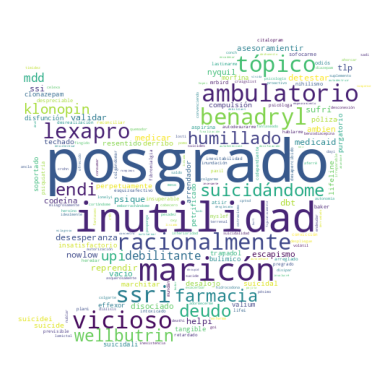

In [ ]:

dict_freq_suicide = dict(zip(not_in_non_suicide['text_tokenize'],not_in_non_suicide['count']))
masks=np.array(img)
masks = np.invert(masks)
wordcloud2 = WordCloud(font_path=None,
                mask=masks, background_color ='white',
                max_words=200,max_font_size = 256,
                random_state=42, width=masks.shape[1],
                height=masks.shape[0],
                stopwords = set(STOPWORDS))


wordcloud2.generate_from_frequencies(dict_freq_suicide)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

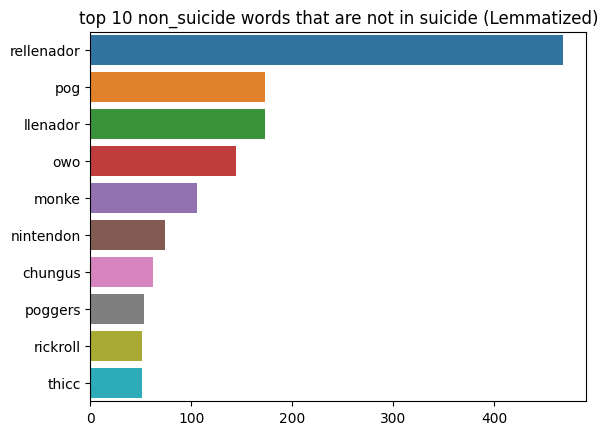

In [ ]:
not_in_suicide=top_words_non_suicide[~top_words_non_suicide['text_tokenize'].isin(top_words_suicide['text_tokenize'])]
#----------------------------------------------------------------
words_remove = ['filler', 'aaaaaaaaaaaaaaaaaaaaaaaaa','nnn','redader','tgénesis','fillerfiller','fiminador','brice','snoo','maddock']
filter= ~not_in_suicide['text_tokenize'].str.contains('|'.join(words_remove))
not_in_suicide=not_in_suicide[filter]
#-------------------------------------------
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(not_in_suicide.iloc[i][0])
  frequency.append(not_in_suicide.iloc[i][1])
sns.barplot(x = frequency, y = words)
ax.set_title('top 10 non_suicide words that are not in suicide (Lemmatized)')
plt.show()

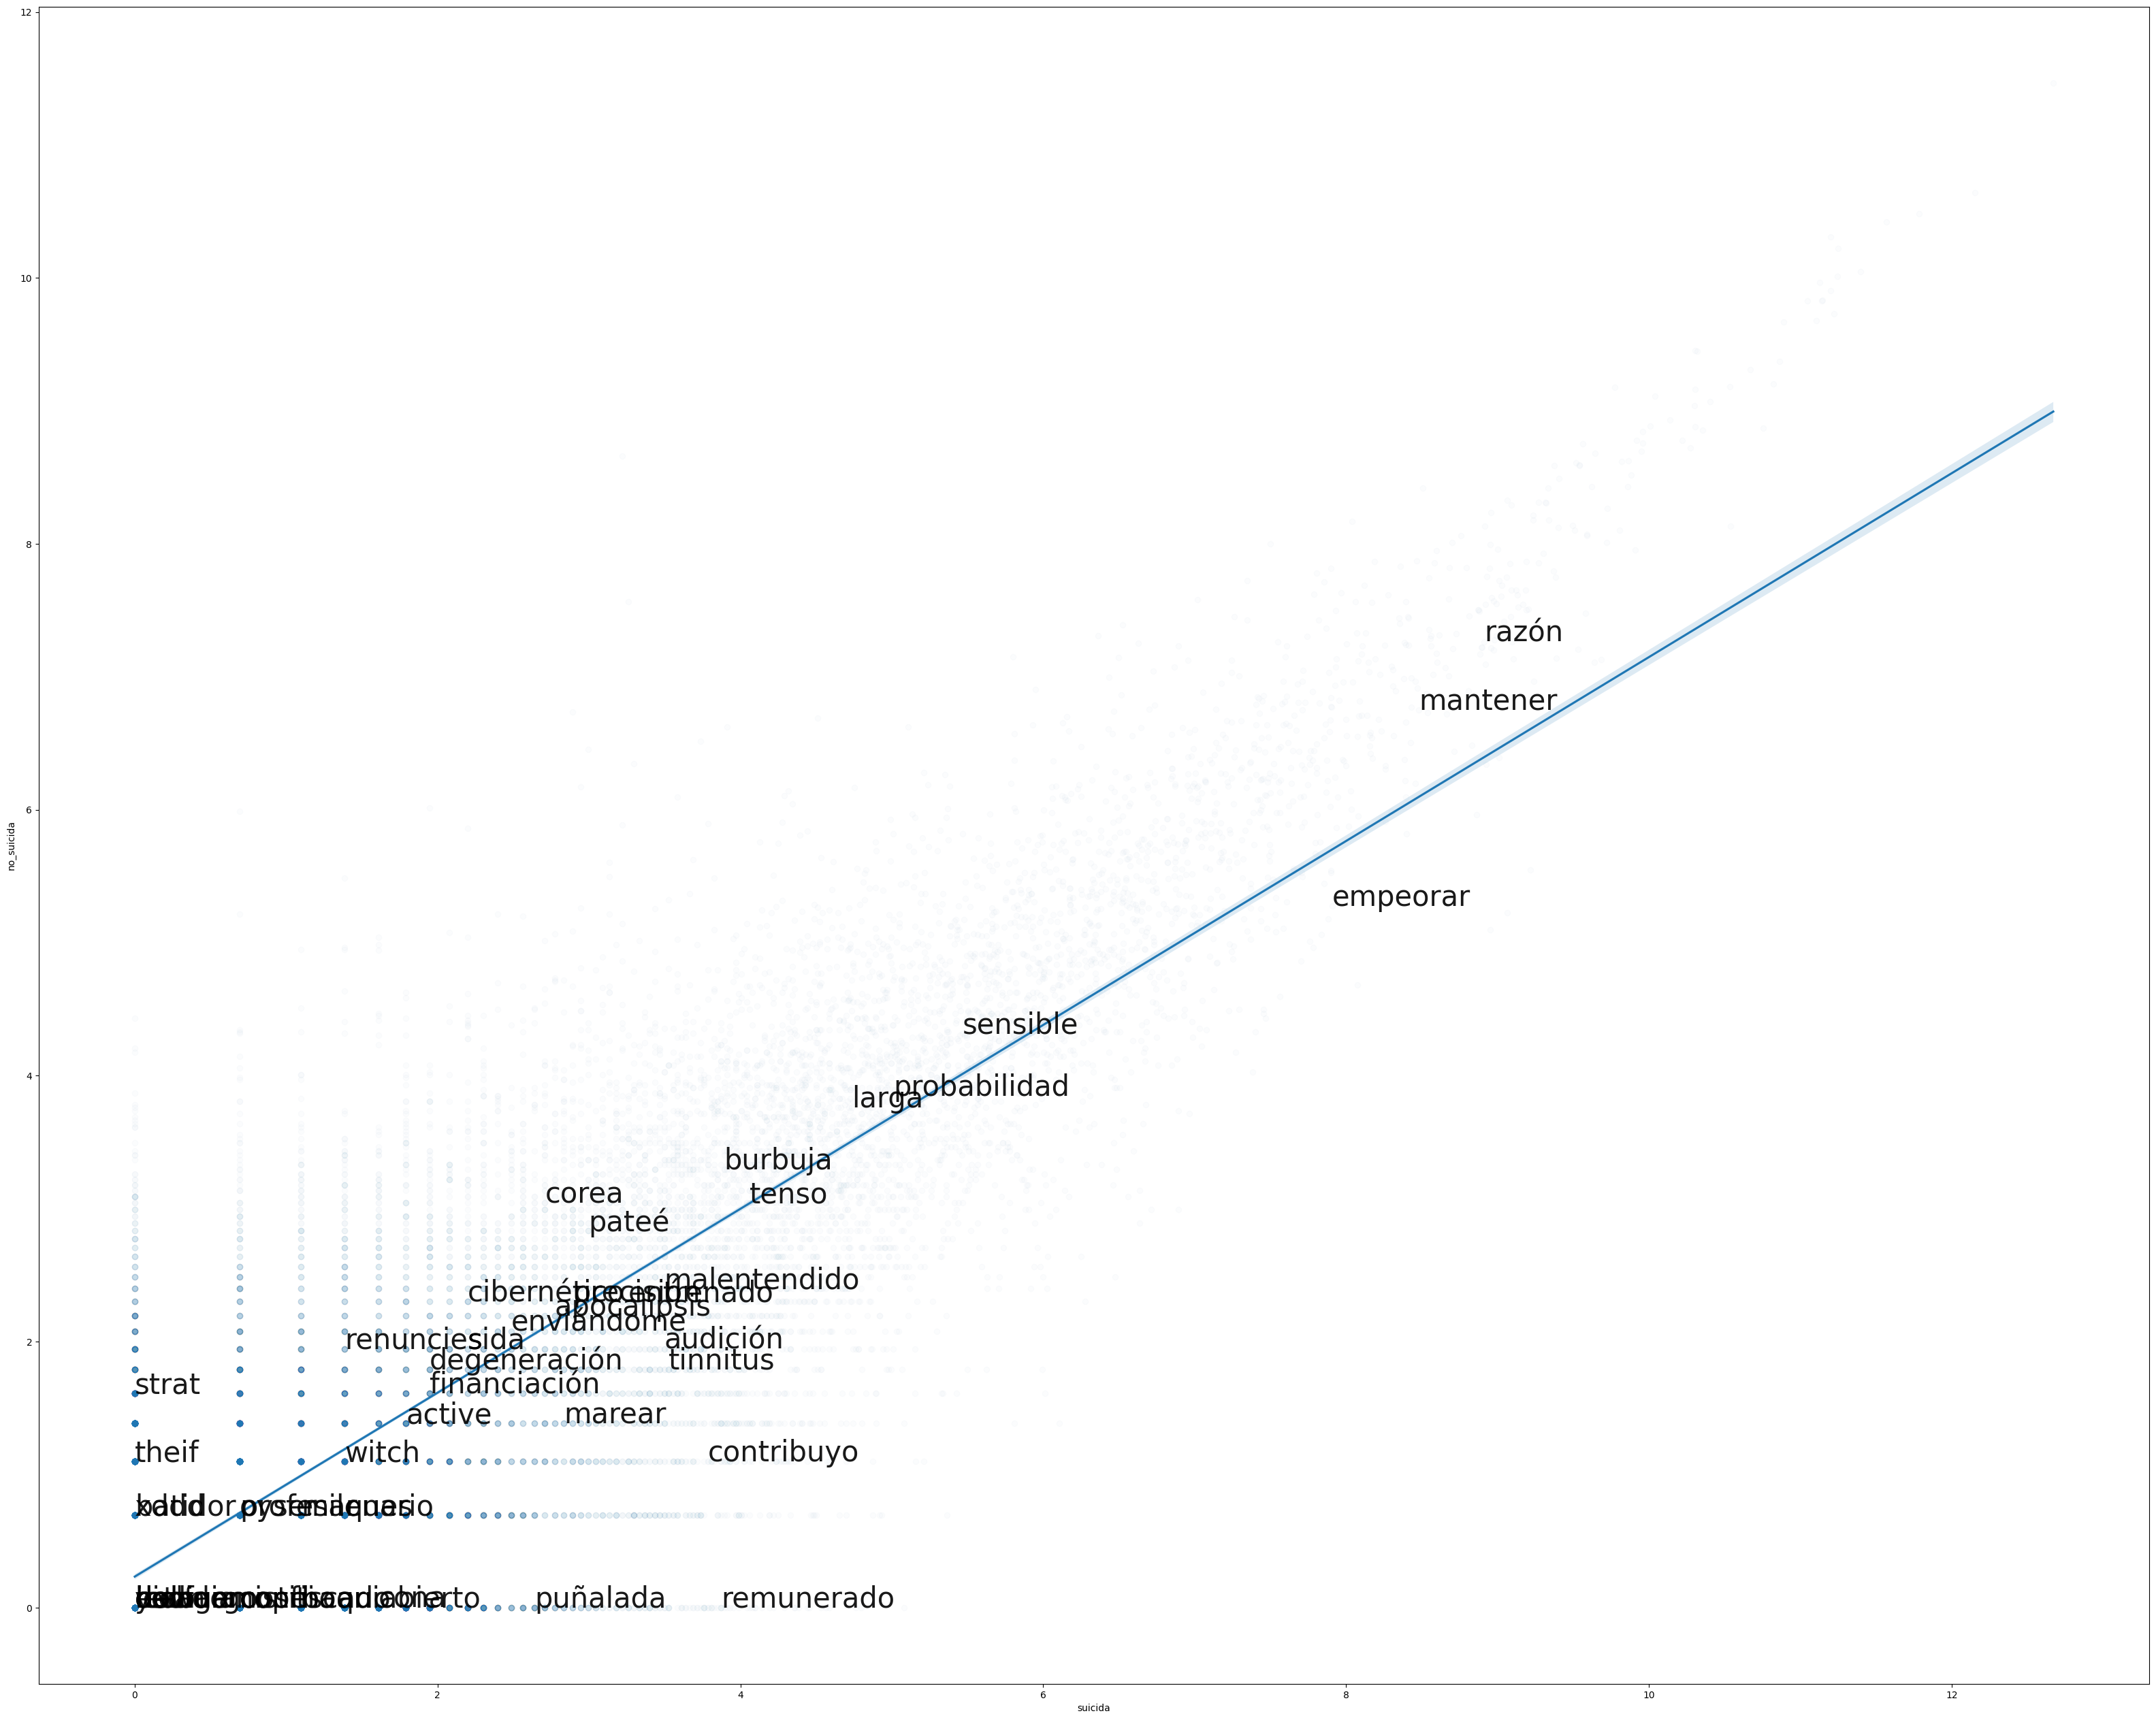

In [ ]:
# Pivotado de datos
tweets_pivot=text_token_norm.groupby(by=['class','text_tokenize'])['text_tokenize'] \
.agg(["count"]).reset_index()\
.pivot(index = "text_tokenize" , columns="class", values= "count")
text_token_norm.columns.name = None


# Gráfico de correlación
# ==============================================================================
f, ax = plt.subplots(figsize=(40, 32))
temp = tweets_pivot.dropna()
sns.regplot(
    x  = np.log(temp.suicida),
    y  = np.log(temp.no_suicida),
    scatter_kws =  {'alpha': 0.015},
    ax = ax
);
#num de muestras -> 60
for i in np.random.choice(range(temp.shape[0]), 50):
    ax.annotate(
        text  = temp.index[i],
        xy    = (np.log(temp.suicida[i]), np.log(temp.no_suicida[i])),
        alpha = 0.9,
        fontsize=30
    )

<h2> EDA on bi-grams <h2>

In [ ]:
data_norm=pd.read_csv('text_lemma.csv')
class_0 = data_norm[data_norm['class'] == 'suicida']
class_1 = data_norm[data_norm['class'] == 'no_suicida']

class_0=class_0.sample(40000)
class_1=class_1.sample(40000)
data_norm=pd.concat([class_0,class_1], axis=0)
data_norm['text_lemma'] = data_norm['text_lemma'].astype('str')

data_norm.value_counts('class')


class
no_suicida    40000
suicida       40000
dtype: int64

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=list(stopwords.words("spanish"))
stop.extend(['pok	','megathiccc','snoo','fillerfiller','relleno', 'rellenador','eve','filler','maíz','pop','aaaaaaaaaaaaaaaaaaaaaaaaa','pog','nnn','redader','nnn','nowoww','mei','iti','nowlow','upi'])

def remove_stopwords(text):
    stopwords_esp = stopwords.words('spanish')
    words = text.split()
    text= [word for word in words if word not in stopwords_esp or word=='no']
    return " ".join(text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize

def tokenize(text):
  return word_tokenize(text)

def bigrams(text_tokenize):
  bigramas = []
  for i in range(len(text_tokenize)-1):
    bigrama = " ".join([text_tokenize[i], text_tokenize[i+1]])
    bigramas.append(bigrama)
  return bigramas



In [ ]:
data_norm['text_lemma'] = data_norm['text_lemma'].apply(lambda x: remove_stopwords(x))
data_norm['text_tokenize']=data_norm['text_lemma'].apply(lambda x: tokenize(x))
data_norm['text_bigram'] = data_norm['text_tokenize'].apply(lambda x: bigrams(x))

In [ ]:
text_token_norm = data_norm.explode('text_bigram')
print('Bi-grams per category')
print('--------------------------')
text_token_norm.groupby(by='class')['text_bigram'].count()

Bi-grams per category
--------------------------


class
no_suicida    1092370
suicida       3488443
Name: text_bigram, dtype: int64

In [ ]:
# Palabras distintas utilizadas por cada categoría
print('different Bi-gramas per category ')
print('----------------------------')
text_token_norm.groupby(by='class')['text_bigram'].nunique()


different Bi-gramas per category 
----------------------------


class
no_suicida    497746
suicida       931562
Name: text_bigram, dtype: int64

In [ ]:
bi_word_count=text_token_norm.groupby(['class', 'text_bigram'])['text_bigram'].size().reset_index(name='count')
bi_top_words_suicide = bi_word_count[bi_word_count['class'] == 'suicida'].sort_values('count', ascending=False)[['text_bigram','count']]
bi_top_words_non_suicide = bi_word_count[bi_word_count['class'] == 'no_suicida'].sort_values('count', ascending=False)[[ 'text_bigram','count']]

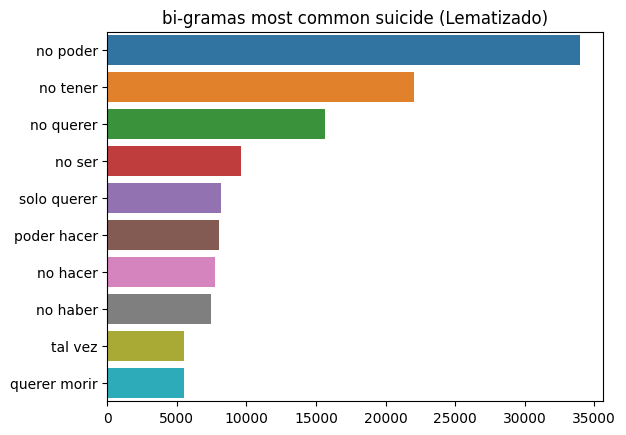

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(bi_top_words_suicide.iloc[i][0])
  frequency.append(bi_top_words_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('bi-gramas most common suicide (Lematizado)')
plt.show()

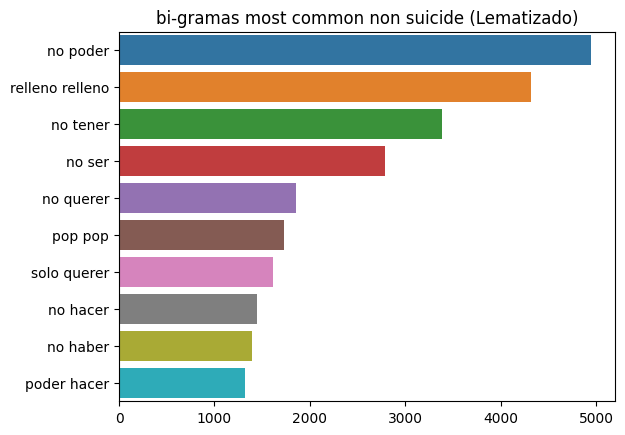

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(bi_top_words_non_suicide.iloc[i][0])
  frequency.append(bi_top_words_non_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('bi-gramas most common non suicide (Lematizado)')
plt.show()

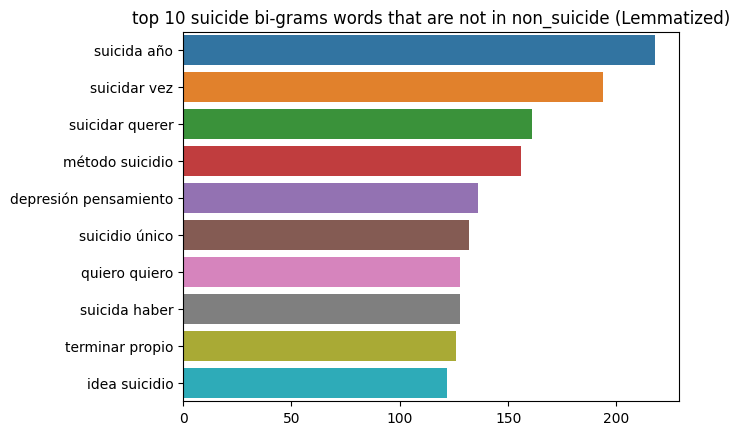

In [ ]:
bi_not_in_non_suicide = bi_top_words_suicide[~bi_top_words_suicide['text_bigram'].isin(bi_top_words_non_suicide['text_bigram'])]
#----------------------------------------------------------------
words_remove = ['plz plz','oof oof']
filter= ~bi_not_in_non_suicide['text_bigram'].str.contains('|'.join(words_remove))
bi_not_in_non_suicide=bi_not_in_non_suicide[filter]
#-------------------------------------------
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(bi_not_in_non_suicide.iloc[i][0])
  frequency.append(bi_not_in_non_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('top 10 suicide bi-grams words that are not in non_suicide (Lemmatized)')
plt.show()

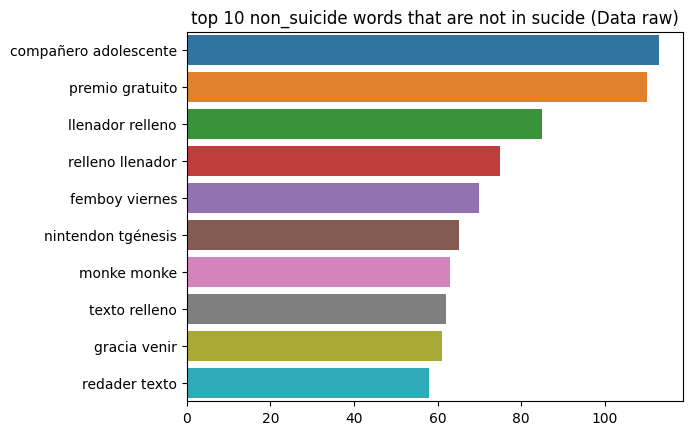

In [ ]:
bi_not_in_suicide=bi_top_words_non_suicide[~bi_top_words_non_suicide['text_bigram'].isin(bi_top_words_suicide['text_bigram'])]
#----------------------------------------------------------------
words_remove = ['relleno relleno', 'pop pop','maíz maíz','pastel pastel','filler filler','eve eve','rellenador relleno','relleno rellenador',
                'aaaaaaaaaaaaaaaaaaaaaaaaa aaaaaaaaaaaaaaaaaaaaaaaaa','llenado llenado','the the','rellenador rellenador','llenar llenar','owo owo',
                'chaps chaps','filtro filtro', 'apple apple']
filter= ~bi_not_in_suicide['text_bigram'].str.contains('|'.join(words_remove))
bi_not_in_suicide=bi_not_in_suicide[filter]
#-------------------------------------------
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(bi_not_in_suicide.iloc[i][0])
  frequency.append(bi_not_in_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('top 10 non_suicide words that are not in sucide (Data raw)')
plt.show()

<h2>EDA on trigrams<h2>

In [ ]:
def trigrams(text_tokenize):
  trigramas = []
  for i in range(len(text_tokenize)-2):
    trigrama = " ".join([text_tokenize[i], text_tokenize[i+1],text_tokenize[i+2]])
    trigramas.append(trigrama)
  return trigramas


In [ ]:

data_norm['text_trigram'] = data_norm['text_tokenize'].apply(lambda x: trigrams(x))

In [ ]:
#Bigramas totales por categoría
text_token_norm = data_norm.explode('text_trigram')
print('tri-grams per category')
print('--------------------------')
text_token_norm.groupby(by='class')['text_trigram'].count()

tri-grams per category
--------------------------


class
no_suicida    1052482
suicida       3448481
Name: text_trigram, dtype: int64

In [ ]:
#data_norm['texto_trigram'] = data_norm['texto_trigram'].astype('str')
tri_word_count=text_token_norm.groupby(['class', 'text_trigram'])['text_trigram'].size().reset_index(name='count')
tri_top_words_suicide = tri_word_count[tri_word_count['class'] == 'suicida'].sort_values('count', ascending=False)[['text_trigram','count']]
tri_top_words_non_suicide = tri_word_count[tri_word_count['class'] == 'no_suicida'].sort_values('count', ascending=False)[[ 'text_trigram','count']]

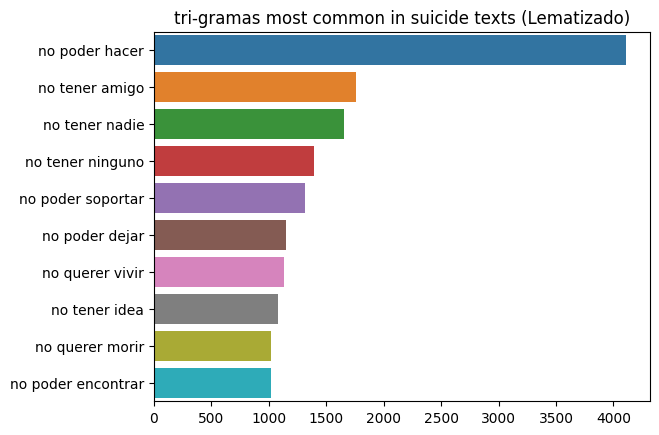

In [ ]:
words, frequency = [], []
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(tri_top_words_suicide.iloc[i][0])
  frequency.append(tri_top_words_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('tri-gramas most common in suicide texts (Lematizado)')
plt.show()

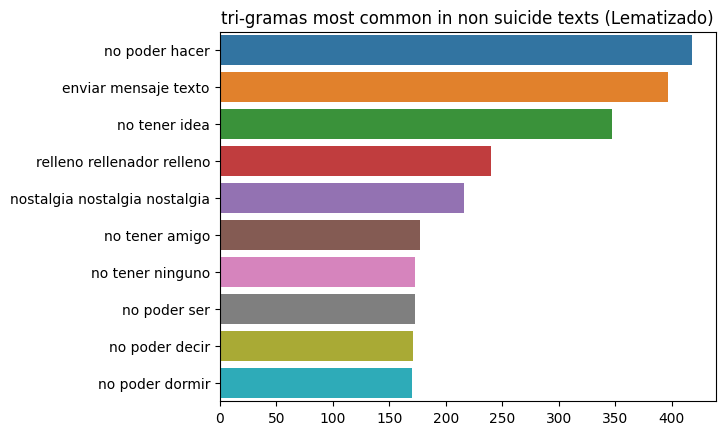

In [ ]:
words, frequency = [], []
#---------------------------
words_remove = ['relleno relleno relleno', 'pop pop pop','maíz maíz maíz','pastel pastel pastel','filler filler filler','eve eve eve',
                'amp amp amp', 'llenado llenado llenado','texto texto texto']
filter= ~tri_top_words_non_suicide['text_trigram'].str.contains('|'.join(words_remove))
tri_top_words_non_suicide=tri_top_words_non_suicide[filter]
#------------------------------------------------
fig, ax = plt.subplots()
for i in range(0,10):
  words.append(tri_top_words_non_suicide.iloc[i][0])
  frequency.append(tri_top_words_non_suicide.iloc[i][1])

sns.barplot(x = frequency, y = words)
ax.set_title('tri-gramas most common in non suicide texts (Lematizado)')
plt.show()